<a href="https://colab.research.google.com/github/SIDED00R/machinelearning/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install cmake
!pip3 install dlib
!pip3 install face_recognition

     |████████████████████████████████| 100.1 MB 8.5 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=c825422c6299f02cc55db8d61d4943e9086731d33806d5c0b14ad5b69ae47eb0
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import os
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
file_list: ['image1.jpeg', 'image2.jpeg', 'image3.jpeg']


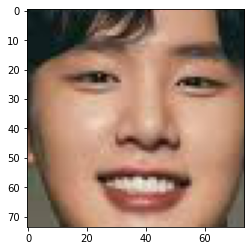

In [3]:
import os
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
# directory의 file list 불러오기
dir_path = '/content/gdrive/MyDrive/Colab Notebooks/image'
file_list = os.listdir(dir_path)
print ("file_list: {}".format(file_list))

# 얼굴 영역만 잘라서 출력하는 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if face_locations:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face
    else:
        return []

# 임베딩 벡터 구하기
image_file = os.path.join(dir_path, 'image1.jpeg')
cropped_face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 이미지 확인
%matplotlib inline

plt.imshow(cropped_face)

In [4]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(cropped_face)  
embedding

# embedding dict 만드는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            # splitext = file, extension
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face

    return embedding_dict, cropped_dict

# embedding_dict 만들기
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path)
embedding_dict['image1']

# 두 얼굴 사이의 거리 구하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# 내 사진으로 비교
get_distance('image1','image2')

# name1과 name2의 거리를 비교하는 함수
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 거리를 비교할 name1 미리 지정
sort_key_func = get_sort_key_func('image1')

# 순위에 맞는 이미지 출력
def get_nearest_face_images(sorted_faces, top=5):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(2, top, 1)
    plt.imshow(cropped_dict[sorted_faces[0][0]])
    for i in range(1, top+1):
        fig.add_subplot(2, top, i+5)
        plt.imshow(cropped_dict[sorted_faces[i][0]])

# 가장 닮은 꼴 찾기
def get_nearest_face(name, top=2):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print(f'순위 {i} : 이름 ({sorted_faces[i][0]}), 거리({sort_key_func(sorted_faces[i][0])})')
    return sorted_faces

# 순위 출력
sorted_faces = get_nearest_face('image1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  app.launch_new_instance()


순위 1 : 이름 (image2), 거리(0.4324177454476743)
순위 2 : 이름 (image3), 거리(0.8602113482428942)


{'Mouth': array([[156, 389],
       [196, 369],
       [240, 361],
       [270, 369],
       [301, 364],
       [339, 377],
       [374, 402],
       [338, 447],
       [297, 464],
       [264, 466],
       [231, 461],
       [189, 438],
       [169, 391],
       [238, 382],
       [269, 387],
       [299, 386],
       [361, 403],
       [298, 429],
       [266, 430],
       [234, 426]]), 'Right_Eyebrow': array([[ 55, 108],
       [ 91,  76],
       [141,  63],
       [191,  66],
       [240,  84]]), 'Left_Eyebrow': array([[321,  93],
       [367,  78],
       [416,  78],
       [462,  95],
       [487, 134]]), 'Right_Eye': array([[113, 160],
       [145, 150],
       [178, 151],
       [207, 169],
       [175, 173],
       [142, 171]]), 'Left_Eye': array([[345, 177],
       [377, 162],
       [409, 163],
       [436, 177],
       [410, 185],
       [377, 184]]), 'Nose': array([[280, 150],
       [280, 190],
       [281, 231],
       [280, 273],
       [221, 309],
       [248, 316],
  

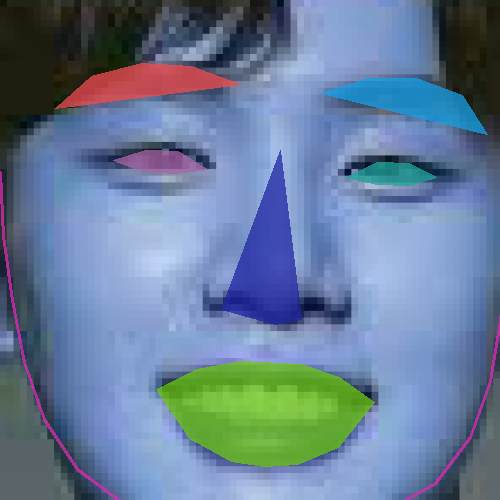

In [6]:
from collections import OrderedDict
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import argparse
import dlib
import imutils

facial_features_cordinates = {}
# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_INDEXES = OrderedDict([
    ("Mouth", (48, 68)),
    ("Right_Eyebrow", (17, 22)),
    ("Left_Eyebrow", (22, 27)),
    ("Right_Eye", (36, 42)),
    ("Left_Eye", (42, 48)),
    ("Nose", (27, 35)),
    ("Jaw", (0, 17))
])
                                                                                                                                                                                                    



def shape_to_numpy_array(shape, dtype="int"):
    

    # initialize the list of (x, y)-coordinates
    coordinates = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coordinates[i] = (shape.part(i).x, shape.part(i).y)

    

    # return the list of (x, y)-coordinates
    return coordinates


def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):

    

    # create two copies of the input image -- one for the
    # overlay and one for the final output image
    overlay = image.copy()
    output = image.copy()

    

    # if the colors list is None, initialize it with a unique

    # color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
                  (168, 100, 168), (158, 163, 32),
                  (163, 38, 32), (180, 42, 220)]

    

    # loop over the facial landmark regions individually
    for (i, name) in enumerate(FACIAL_LANDMARKS_INDEXES.keys()):
        

        # grab the (x, y)-coordinates associated with the
        # face landmark
        (j, k) = FACIAL_LANDMARKS_INDEXES[name]

        

        pts = shape[j:k]
        facial_features_cordinates[name] = pts

        # check if are supposed to draw the jawline
        if name == "Jaw":
            

            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull of the facial
        # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    # apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # return the output image
    print(facial_features_cordinates)
    return output



# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/gdrive/MyDrive/Colab Notebooks/image/shape_predictor_68_face_landmarks.dat')




# load the input image, resize it, and convert it to grayscale

#image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/image/image1.jpeg')
image=cropped_face
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
    

    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = shape_to_numpy_array(shape)

    

    output = visualize_facial_landmarks(image, shape)
    

    cv2_imshow(output)
    cv2.waitKey(0)